In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from wordcloud import WordCloud
from sklearn.svm import SVC

In [3]:
df = pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


In [4]:
X = df['Text']
y = df['Category']
# type(X)
X.sample()
y.sample()

830    entertainment
Name: Category, dtype: object

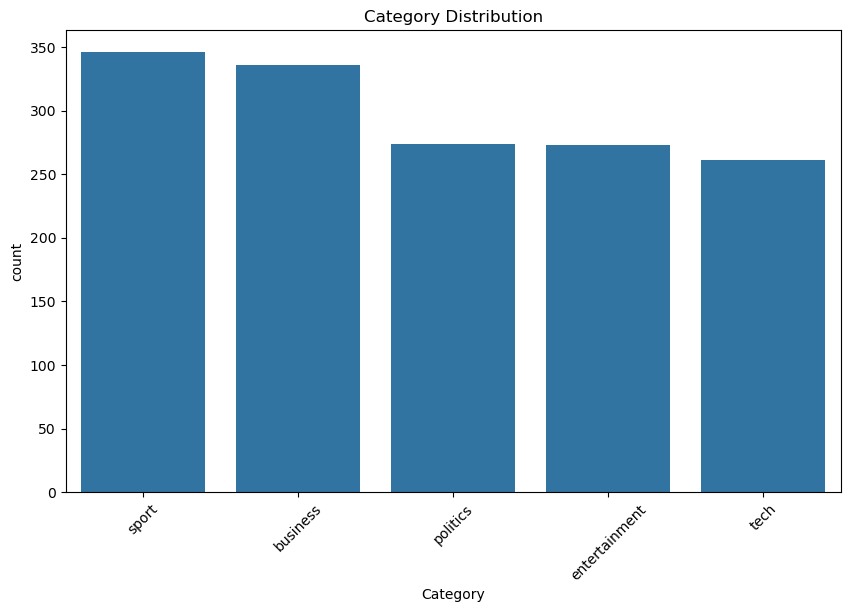

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Category Distribution")
plt.show()

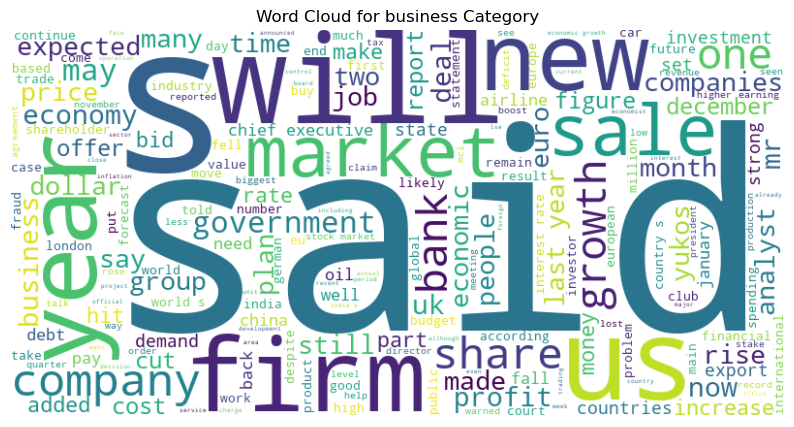

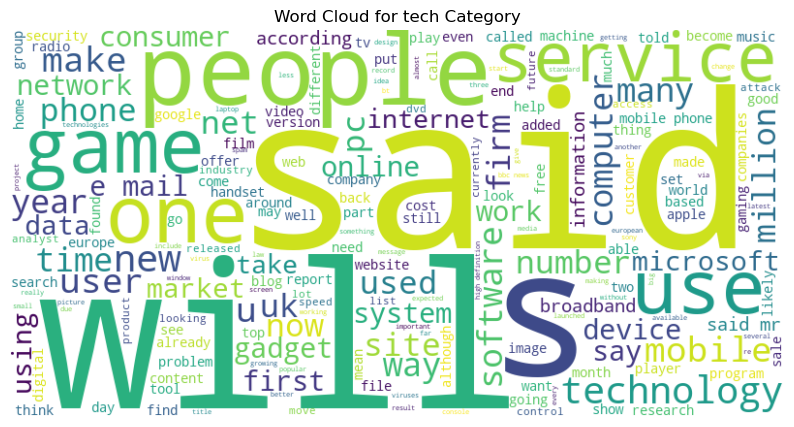

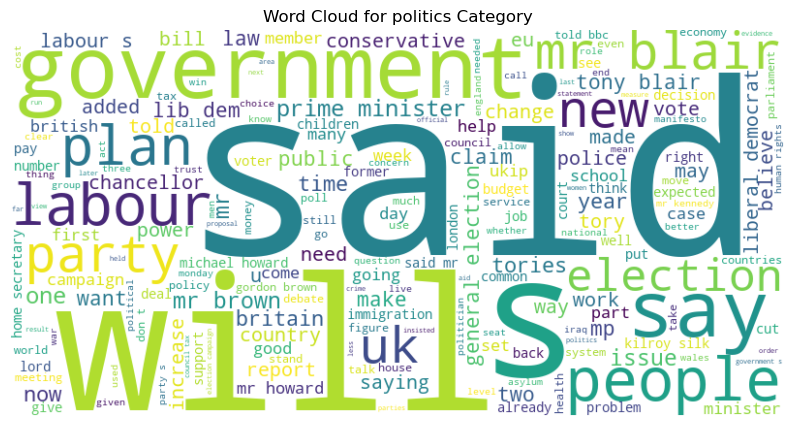

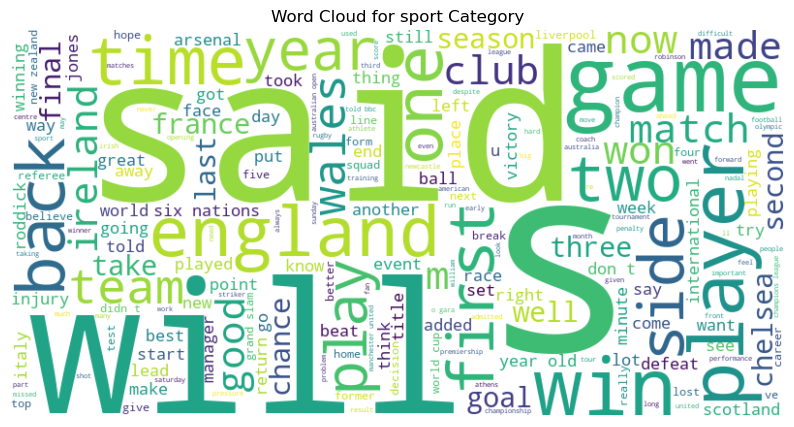

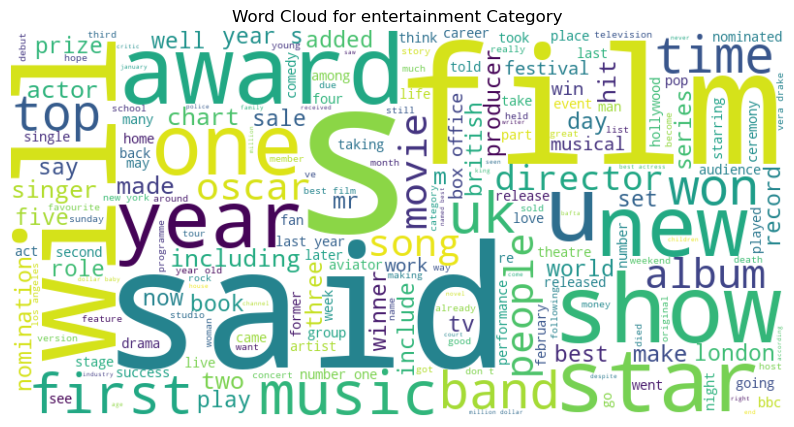

In [6]:
for category in df['Category'].unique():
    text = " ".join(df[df['Category'] == category]['Text'].values)
    wordcloud = WordCloud(
        width = 800,
        height = 400,
        background_color = 'white'
    ).generate(text)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {category} Category')
    plt.axis('off')
    plt.show()

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stopwords = set(stopwords.words('english'))

In [8]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords]
    return ' '.join(words)

print("Hello!! Welcome to my world@@@, 1234!")
print(preprocess_text("Hello!! Welcome to my world@@@, 1234!"))

Hello!! Welcome to my world@@@, 1234!
hello welcome world


In [9]:
df['Text'] = df['Text'].apply(preprocess_text)
df.head()

,ArticleId,Text,Category
0,1833,worldcom exboss launch defence lawyer defendin...,business
1,154,german business confidence slide german busine...,business
2,1101,bbc poll indicates economic gloom citizen majo...,business
3,1976,lifestyle governs mobile choice faster better ...,tech
4,917,enron boss payout eighteen former enron direct...,business


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
lr_model = make_pipeline(TfidfVectorizer(stop_words='english'), LogisticRegression())
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [12]:
print("Accuracy = ",accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Accuracy =  0.9664429530201343
               precision    recall  f1-score   support

     business       0.92      0.97      0.95        75
entertainment       1.00      1.00      1.00        46
     politics       0.96      0.95      0.95        56
        sport       0.98      1.00      0.99        63
         tech       0.98      0.91      0.95        58

     accuracy                           0.97       298
    macro avg       0.97      0.97      0.97       298
 weighted avg       0.97      0.97      0.97       298



In [13]:
new_texts = [
    'The latest football match ended in a draw, with great performances from both teams.',
    'The government announced new environmental policies aimed at reducing carbon footprint'
]

new_predictions = lr_model.predict(new_texts)

for text, prediction in zip(new_texts, new_predictions):
    print(f"Text: {text}\nPredicted Category: {prediction}")

Text: The latest football match ended in a draw, with great performances from both teams.
Predicted Category: sport
Text: The government announced new environmental policies aimed at reducing carbon footprint
Predicted Category: business


In [14]:
import joblib
joblib.dump(lr_model,'lr_model.gz')

['lr_model.gz']